The purpose of this notebook is to test, demonstrate, and document the functionality of the scipy.spatial.Voronoi library.

### Voronoi Terminology
Cell/Segment/Region: a cell in the Voronoi tessellation

Ridge: a boundary of a Voronoi cell

Centroid: the point within a Voronoi cell that defines the ridges of that cell

Vertex: a point where ridges in a Voronoi tessellation intersect

In [3]:
from scipy.spatial import Voronoi, voronoi_plot_2d

import matplotlib.pyplot as plt
import numpy as np

In [4]:
### Invalid points
invalid_centroids_cospherical = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])  # "Qhull precision error: initial Delaunay input sites are cocircular or cospherical"
invalid_centroids_2D_not_enough = np.array([[0, 0], [1, 0], [1, 1]])  # "QH6214 qhull input error: not enough points(3) to construct initial simplex (need 4)"
invalid_centroids_4D_not_enough = np.array([[0, 0.1, 0, 0.1], [1.1, 0, 1.2, 1.2], [1.1, 1, 2.1, 1.1], [0, 1, 0, 1]])  # "QH6214 qhull input error: not enough points(4) to construct initial simplex (need 6)"


### Valid points
centroids_2D = np.array([[0, 0], [0, 1], [0, 2], [1, 0], [1, 1], [1, 2], [2, 0], [2, 1], [2, 2]])
noisy_centroids_2D = np.array([[0, .2], [-.2, 1], [0, 2.1], [1.1, -.1], [1, 1], [0.9, 1.9],[2.2, -0.2], [1.9, 1.1], [2.1, 2.3]])
centroids_3D = np.array([[0, 0.1, 0.1], [0, 1.2, 0], [0, 2.2, 0], [1.1, 0.3, 1], [1, 1.1, 1], [1.8, 2, 0.9], [2, 0, 1.8], [2, 1, 2], [2, 2, 2]])

CENTROIDS = noisy_centroids_2D

In [5]:
# For co-spherical inputs, use Qz (e.g. `Voronoi(points_2d, qhull_options="Qz")`), but cannot use incremental mode
# For co-spherical inputs, QJ will also work, but it will add random noise to the input points to overcome issue
vor = Voronoi(CENTROIDS, incremental=True)

### Library Attribute Terminology (see scipy.spatial.Voronoi docs for further details)
`points`: the NumPy array of centroids passed into the Voronoi object

`vertices`: a NumPy array of all vertices in the Voronoi tessellation

`ridge_vertices`: a NumPy array of sub-arrays representing ridges that contain the indices of vertices in `vertices` that form the ridge

`ridge_points`: a NumPy array of sub-arrays representing ridges (with each index corresponding with `ridge_vertices`) that contain the indices of two centroids in `points` within which each ridge lies

`regions`: a NumPy array of sub-arrays representing Voronoi cells containing indices of vertices in `vertices` that form this cell

`point_regions`: an array that corresponds with `points` index-wise where each element is an index of a cell in `regions`

`ridge_dict`: a Python dictionary mapping `ridge_points` to `ridge_vertices`

_Examples of these attributes based on centroids defined earlier are demonstrated below._

In [6]:
print("vor.ridge_vertices:", vor.ridge_vertices)
print("vor.ridge_points:", vor.ridge_points)
print("Ridge Vertices:", vor.vertices[vor.ridge_vertices[0]])

vor.ridge_vertices: [[-1, 2], [-1, 3], [2, 4], [3, 4], [0, 2], [-1, 0], [-1, 1], [1, 3], [5, 9], [5, 6], [6, 7], [7, 8], [8, 9], [-1, 9], [-1, 5], [1, 6], [4, 7], [0, 8]]
vor.ridge_points: [[3 0]
 [3 6]
 [3 4]
 [3 7]
 [0 4]
 [0 1]
 [6 8]
 [6 7]
 [5 2]
 [5 8]
 [5 7]
 [5 4]
 [5 1]
 [2 1]
 [2 8]
 [8 7]
 [7 4]
 [4 1]]
Ridge Vertices: [[0.33252427 1.47135922]
 [0.64915254 0.41355932]]


In [7]:
print("vor.points:", vor.points)
print("vor.regions:", vor.regions)
print("vor.ridge_dict:", vor.ridge_dict)
print("vor.vertices:", vor.vertices)

vor.points: [[ 0.   0.2]
 [-0.2  1. ]
 [ 0.   2.1]
 [ 1.1 -0.1]
 [ 1.   1. ]
 [ 0.9  1.9]
 [ 2.2 -0.2]
 [ 1.9  1.1]
 [ 2.1  2.3]]
vor.regions: [[4, 2, -1, 3], [2, 0, -1], [3, 1, -1], [9, 5, 6, 7, 8], [9, -1, 5], [6, 1, -1, 5], [7, 4, 3, 1, 6], [8, 0, 2, 4, 7], [9, -1, 0, 8]]
vor.ridge_dict: {(3, 0): [-1, 2], (3, 6): [-1, 3], (3, 4): [2, 4], (3, 7): [3, 4], (0, 4): [0, 2], (0, 1): [-1, 0], (6, 8): [-1, 1], (6, 7): [1, 3], (5, 2): [5, 9], (5, 8): [5, 6], (5, 7): [6, 7], (5, 4): [7, 8], (5, 1): [8, 9], (2, 1): [-1, 9], (2, 8): [-1, 5], (8, 7): [1, 6], (7, 4): [4, 7], (4, 1): [0, 8]}
vor.vertices: [[0.4        0.725     ]
 [5.17419355 1.17096774]
 [0.64915254 0.41355932]
 [1.69714286 0.36857143]
 [1.512      0.492     ]
 [0.88333333 3.95      ]
 [1.61176471 1.76470588]
 [1.4        1.5       ]
 [0.4        1.38888889]
 [0.33252427 1.47135922]]


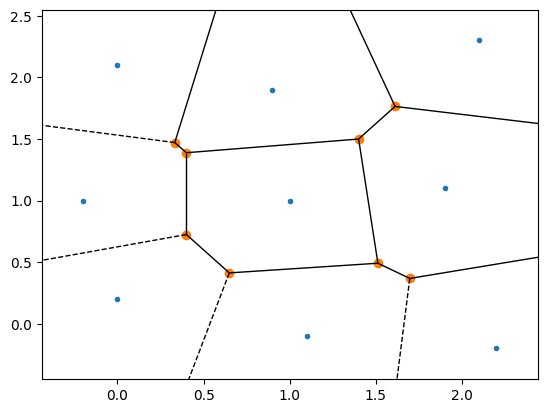

In [8]:
fig = voronoi_plot_2d(vor)
plt.show()

In [9]:
print("---ADDING POINT (IN INCREMENTAL MODE)---")
vor.add_points([[2.5, 2.5]])
print("vor.points:", vor.points)
print("vor.vertices:", vor.vertices)

---ADDING POINT (IN INCREMENTAL MODE)---
vor.points: [[ 0.   0.2]
 [-0.2  1. ]
 [ 0.   2.1]
 [ 1.1 -0.1]
 [ 1.   1. ]
 [ 0.9  1.9]
 [ 2.2 -0.2]
 [ 1.9  1.1]
 [ 2.1  2.3]
 [ 2.5  2.5]]
vor.vertices: [[0.4        0.725     ]
 [0.64915254 0.41355932]
 [1.69714286 0.36857143]
 [1.512      0.492     ]
 [0.88333333 3.95      ]
 [1.61176471 1.76470588]
 [1.4        1.5       ]
 [0.4        1.38888889]
 [0.33252427 1.47135922]
 [0.73235294 5.53529412]
 [4.195      0.945     ]
 [2.70909091 1.58181818]]


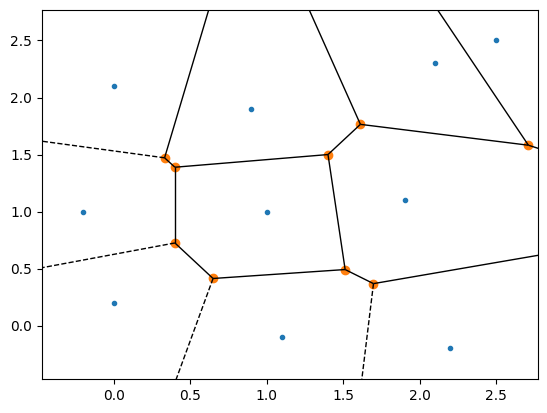

In [10]:
fig1 = voronoi_plot_2d(vor)
plt.show()

In [11]:
print("points[4]:", CENTROIDS[4])
print("points:", CENTROIDS)
print("vor.points:", vor.points)

points[4]: [1. 1.]
points: [[ 0.   0.2]
 [-0.2  1. ]
 [ 0.   2.1]
 [ 1.1 -0.1]
 [ 1.   1. ]
 [ 0.9  1.9]
 [ 2.2 -0.2]
 [ 1.9  1.1]
 [ 2.1  2.3]]
vor.points: [[ 0.   0.2]
 [-0.2  1. ]
 [ 0.   2.1]
 [ 1.1 -0.1]
 [ 1.   1. ]
 [ 0.9  1.9]
 [ 2.2 -0.2]
 [ 1.9  1.1]
 [ 2.1  2.3]
 [ 2.5  2.5]]


In [23]:
print("regions:", vor.regions)
print("point_region:", vor.point_region)
print("ridge_vertices:", vor.ridge_vertices)
print("ridge_points:", vor.ridge_points)

regions: [[2, 3, 1, -1], [7, 8, 4, 5, 6], [6, 7, 0, 1, 3], [7, 8, -1, 0], [-1, 9, 11, 10], [-1, 8, 4, 9], [11, 5, 4, 9], [11, 5, 6, 3, 2, 10], [-1, 2, 10], [-1, 0, 1]]
point_region: [9 3 5 0 2 1 8 7 6 4]
ridge_vertices: [[2, 3], [1, 3], [-1, 1], [-1, 2], [4, 8], [7, 8], [4, 5], [5, 6], [6, 7], [0, 7], [0, 1], [3, 6], [-1, 8], [-1, 0], [-1, 9], [9, 11], [10, 11], [-1, 10], [4, 9], [5, 11], [2, 10]]
ridge_points: [[3 7]
 [3 4]
 [3 0]
 [3 6]
 [5 2]
 [5 1]
 [5 8]
 [5 7]
 [5 4]
 [4 1]
 [4 0]
 [4 7]
 [1 2]
 [1 0]
 [9 2]
 [9 8]
 [9 7]
 [9 6]
 [2 8]
 [8 7]
 [7 6]]


In [22]:
print("                                    region for centroid 4:", vor.point_region[4])
print("                       vertices for region for centroid 4:", vor.regions[vor.point_region[4]])
print("coordinates of Voronoi vertices associated with centroid 4:")
print(vor.vertices[vor.regions[vor.point_region[4]]])

                                    region for centroid 4: 2
                       vertices for region for centroid 4: [6, 7, 0, 1, 3]
coordinates of Voronoi vertices associated with centroid 4:
[[1.4        1.5       ]
 [0.4        1.38888889]
 [0.4        0.725     ]
 [0.64915254 0.41355932]
 [1.512      0.492     ]]


In [14]:
print("ridge_dict:", vor.ridge_dict)

ridge_dict: {(3, 7): [2, 3], (3, 4): [1, 3], (3, 0): [-1, 1], (3, 6): [-1, 2], (5, 2): [4, 8], (5, 1): [7, 8], (5, 8): [4, 5], (5, 7): [5, 6], (5, 4): [6, 7], (4, 1): [0, 7], (4, 0): [0, 1], (4, 7): [3, 6], (1, 2): [-1, 8], (1, 0): [-1, 0], (9, 2): [-1, 9], (9, 8): [9, 11], (9, 7): [10, 11], (9, 6): [-1, 10], (2, 8): [4, 9], (8, 7): [5, 11], (7, 6): [2, 10]}
